# Polynominální regrese

## Úkol

- Načtěte dataset s velikostmi a cenami
- Prozkoumejte a zobrazte data
- Vytvořte lineární model a zjistětě jaho R2
- Vytvořte polynomiální modely s různým stupni, zjistěte jejich R2
- Vyberte nejlepší model 

# Načtení dat

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures

In [5]:
df = pd.read_csv ("..\dataset\prices.csv",  sep=';')


# Lineární model
- standardizujte data
- vytvořte a natrénujte lineární model
- zobrazte parametry modelu
- vizualizujte lineární model
- zobrazte skóre modelu

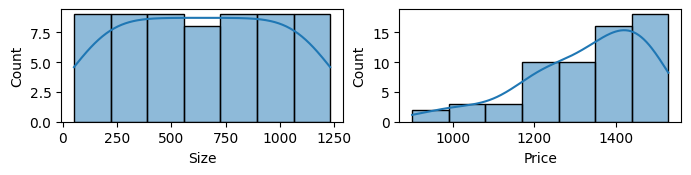

In [6]:
pos = 1
fig = plt.figure(figsize=(8, 12))
for i in df.columns:
    ax = fig.add_subplot(7,2, pos)
    pos = pos + 1
    sns.histplot(df[i],ax=ax, kde=True)

In [7]:
def rescale(X):
    mean = X.mean()
    std = X.std()
    scaled_X = [(i - mean)/std for i in X]
    return pd.Series(scaled_X)

data_std = pd.DataFrame(columns=df.columns)
for i in df.columns:
    data_std[i] = rescale(df[i])

data_std.describe()

,Size,Price
count,6.200000e+01,6.200000e+01
mean,3.187414e-16,-2.467560e-15
std,1.000000e+00,1.000000e+00
min,-1.690536e+00,-2.877085e+00
25%,-8.452679e-01,-5.836494e-01
50%,1.186304e-08,2.048456e-01
75%,8.452678e-01,8.083945e-01
max,1.690536e+00,1.348537e+00


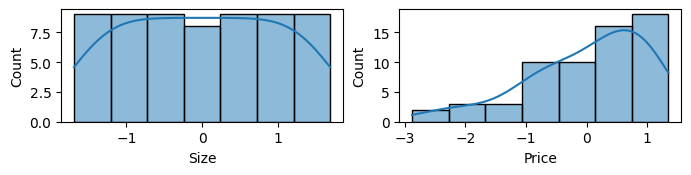

In [8]:
pos = 1
fig = plt.figure(figsize=(8,12))
for i in data_std.columns:
    ax = fig.add_subplot(7,2, pos)
    pos = pos + 1
    sns.histplot(data_std[i],ax=ax, kde=True)

In [9]:
X = data_std[['Size']]
y = data_std['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [10]:
print(f"Koeficient: {linear_model.coef_}")
print(f"Průsečík: {linear_model.intercept_}")

Koeficient: [0.70410985]
Průsečík: 0.07571986871108514


In [11]:
y_pred = linear_model.predict(X_test)
r2_linear = r2_score(y_test, y_pred)
print(f"Skóre R2 lineárního modelu: {r2_linear}")

Skóre R2 lineárního modelu: 0.40202578172342884


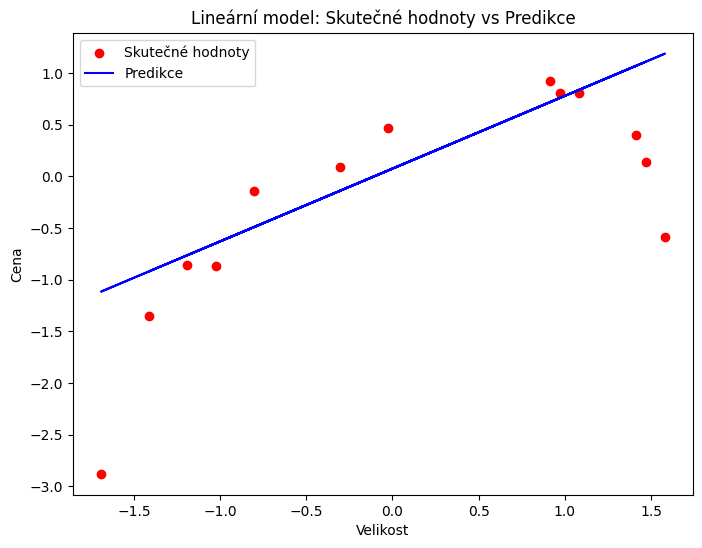

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, color='red', label='Skutečné hodnoty')
plt.plot(X_test, y_pred, color='blue', label='Predikce')
plt.xlabel('Velikost')
plt.ylabel('Cena')
plt.legend()
plt.title('Lineární model: Skutečné hodnoty vs Predikce')
plt.show()

# Vytvořte polynominální regresní model
- vytvořte model polynominální 1D model se stupni 2 - 8
- modely zobrazte
- zobrazte jejich parametry
- zobrazte jejich skóre
- Který model byste vybrali?

c:\Users\Notebook\Documents\UPCE\BMLAI\AI\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


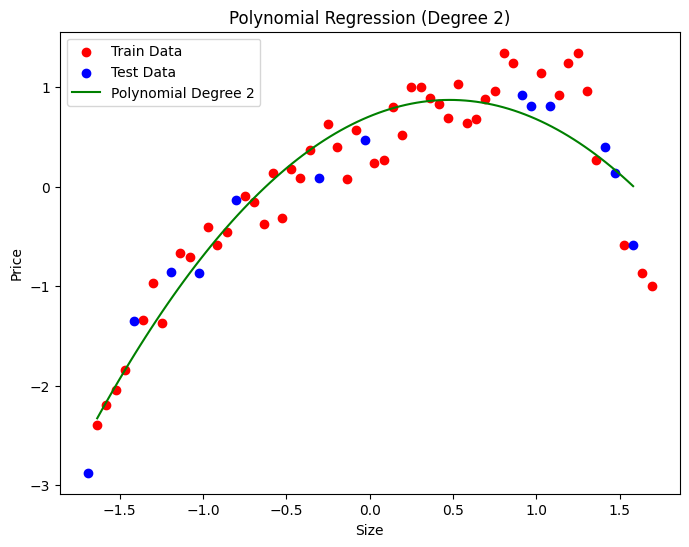

Model pro stupeň 2:
Train R2 score: 0.8643175207566194
Train RMSE: 0.3580446600963934
Test R2 score: 0.9276708394026367
Test RMSE: 0.27720938405266793


c:\Users\Notebook\Documents\UPCE\BMLAI\AI\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


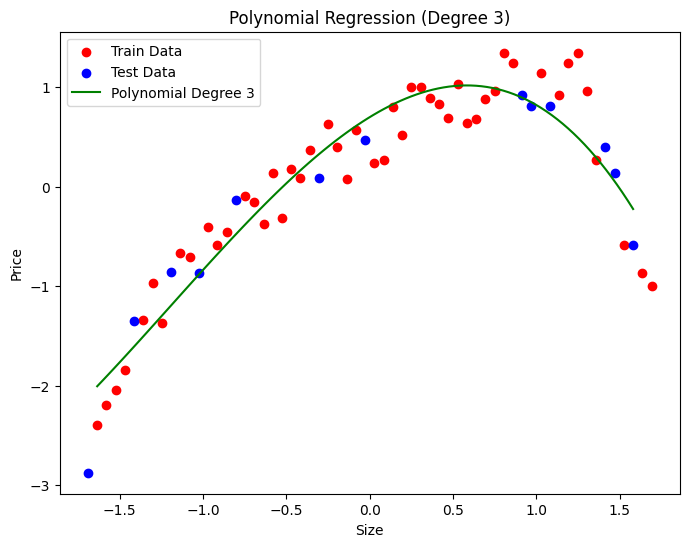

Model pro stupeň 3:
Train R2 score: 0.8873963997063147
Train RMSE: 0.326175588006547
Test R2 score: 0.913855207228095
Test RMSE: 0.3025281075405142


c:\Users\Notebook\Documents\UPCE\BMLAI\AI\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


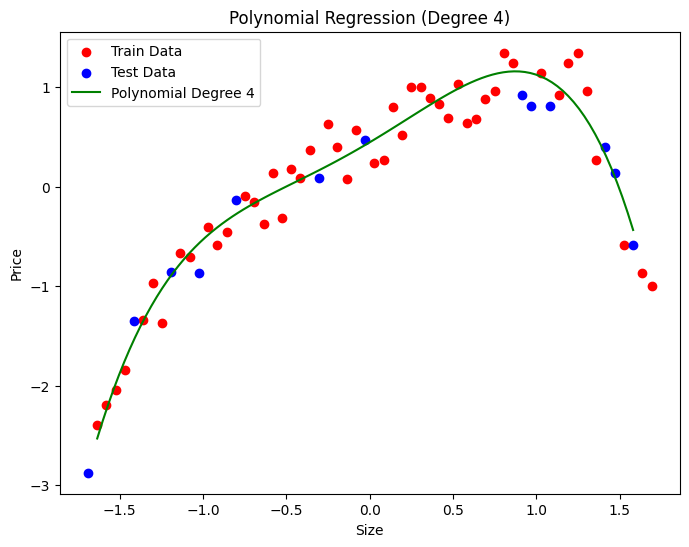

c:\Users\Notebook\Documents\UPCE\BMLAI\AI\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


Model pro stupeň 4:
Train R2 score: 0.9468410975289779
Train RMSE: 0.2241110749185641
Test R2 score: 0.970176917316327
Test RMSE: 0.17800306551294395


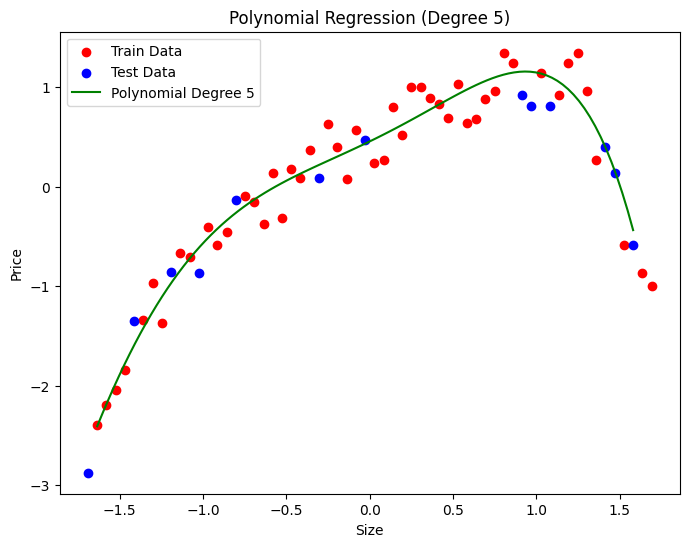

Model pro stupeň 5:
Train R2 score: 0.9499150210120264
Train RMSE: 0.21753496069950864
Test R2 score: 0.963008576134784
Test RMSE: 0.1982447703529041


c:\Users\Notebook\Documents\UPCE\BMLAI\AI\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


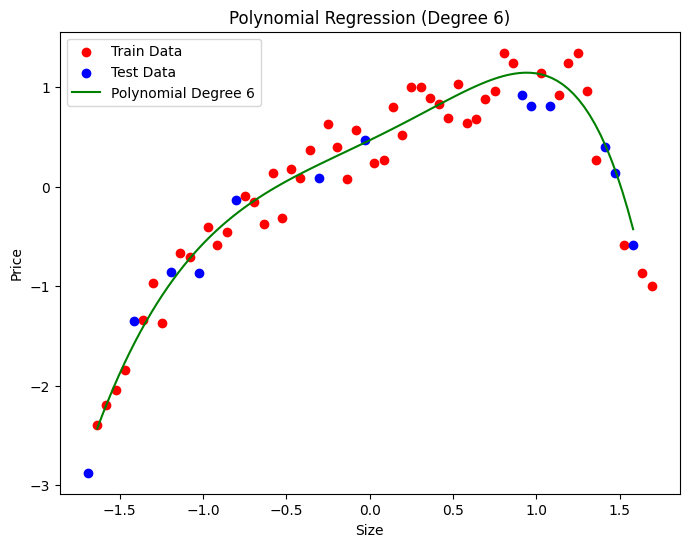

Model pro stupeň 6:
Train R2 score: 0.9500263846821381
Train RMSE: 0.21729298223217128
Test R2 score: 0.9658305030206965
Test RMSE: 0.19053313270200825


c:\Users\Notebook\Documents\UPCE\BMLAI\AI\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


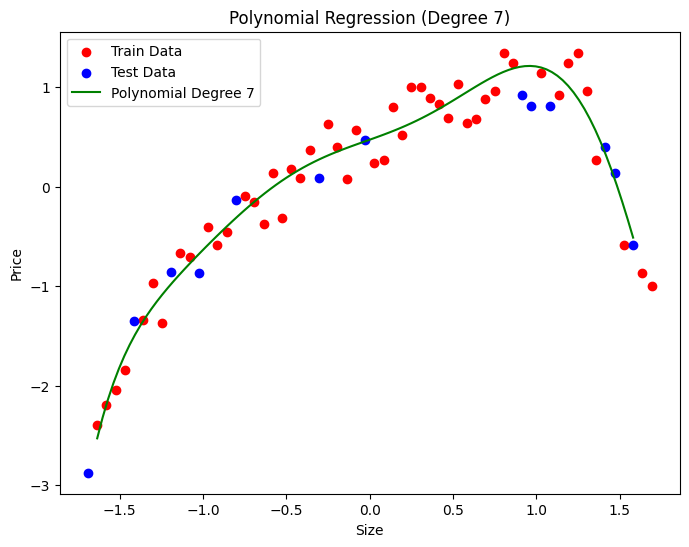

Model pro stupeň 7:
Train R2 score: 0.9521922268836003
Train RMSE: 0.2125321194040308
Test R2 score: 0.9612432985948263
Test RMSE: 0.20291989030323543


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def polynomial_fit(X, y, degree=1):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)  
    poly_model = LinearRegression()
    poly_model.fit(X_poly, y)  
    return poly_model, poly

def visualize_model(poly_model, poly, X_train, y_train, X_test, y_test, degree, x_label="Size", y_label="Price"):
    plt.figure(figsize=(8, 6))

    X_train = np.array(X_train, dtype=float)
    X_test = np.array(X_test, dtype=float)
    
    X_range = np.linspace(min(X_train), max(X_test), 100).reshape(-1, 1)  
    X_range_poly = poly.transform(X_range)  
    y_range_pred = poly_model.predict(X_range_poly)  

    plt.scatter(X_train, y_train, c='r', label="Train Data")  
    plt.scatter(X_test, y_test, c='b', label="Test Data")  
    plt.plot(X_range, y_range_pred, label=f"Polynomial Degree {degree}", color='g')  

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f"Polynomial Regression (Degree {degree})")
    plt.legend()
    plt.show()

def print_model_score(y_true, y_pred, label):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"{label} R2 score: {r2}")
    print(f"{label} RMSE: {rmse}")

for degree in range(2, 8):  
    poly_model, poly = polynomial_fit(X_train, y_train, degree)
    
    y_train_pred = poly_model.predict(poly.transform(X_train))
    y_test_pred = poly_model.predict(poly.transform(X_test))
    
    visualize_model(poly_model, poly, X_train, y_train, X_test, y_test, degree)
    
    print(f"Model pro stupeň {degree}:")
    print_model_score(y_train, y_train_pred, "Train")
    print_model_score(y_test, y_test_pred, "Test")

Zvolil jsem model pro stupeň 4, protože nejnižší RMSE a má nejlepší R2